In [20]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [10]:
tickers=['PG','F','MSFT','GE']
new_data = pd.DataFrame()
for t in tickers :
    new_data[t] = wb.DataReader(t,'quandl','1995-1-1','2018-1-1')['AdjClose']

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5790 entries, 2017-12-29 to 1995-01-03
Data columns (total 4 columns):
PG      5790 non-null float64
F       5790 non-null float64
MSFT    5790 non-null float64
GE      5790 non-null float64
dtypes: float64(4)
memory usage: 226.2 KB


In [12]:
#Inverting the dataset - upside down
new_data = new_data.iloc[::-1]

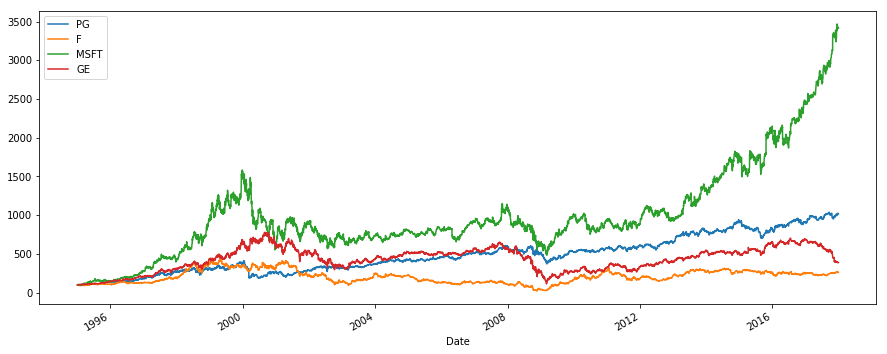

In [13]:
#Normalizing the data and plotting
(new_data / new_data.iloc[0]*100).plot(figsize = (15,6));
plt.show()

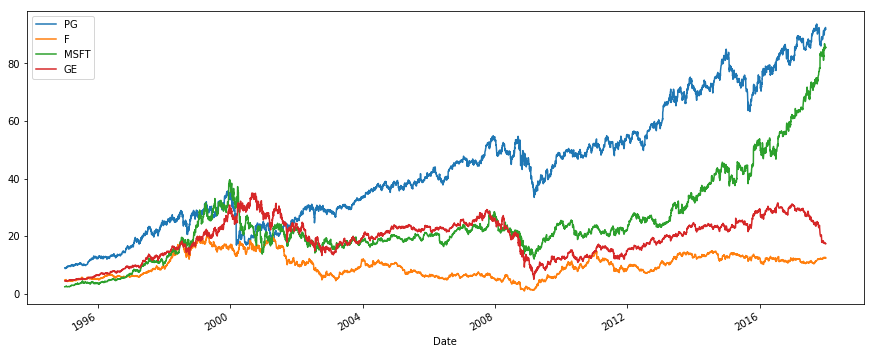

In [15]:
#if not normalized
new_data.plot(figsize = (15,6))
plt.show()

In [17]:
returns = (new_data / new_data.shift(1)) - 1
returns.head()

,PG,F,MSFT,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.026911,0.007310,0.000000
1995-01-05,-0.014221,-0.008735,-0.016493,0.002549
1995-01-06,0.004098,0.000000,0.016770,-0.004889
1995-01-09,-0.006041,0.017624,-0.006268,-0.009827


In [22]:
annual_returns = (((returns.mean() + 1)**250) -1)
weights = np.array([0.25,0.25,0.25,0.25])

In [23]:
pfolio = str(round(np.dot(annual_returns,weights),5)*100) + '%'
print(pfolio)

14.848%


In [25]:
weights_1 = np.array([0.40,0.05,0.40,0.15])
pfolio_1 = str(round(np.dot(annual_returns,weights_1),5)*100) + '%'
print(pfolio_1)

16.56%
